<a href="https://colab.research.google.com/github/k2345810/k2345810--Project-Dessertation/blob/main/dessertation_main_code_of_visualization_and_all_modules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Libraries
!pip install dask[complete]
!pip install imbalanced-learn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 18.6 MB/s eta 0:00:00


In [2]:
#Connecting to Google Drive
drive.mount('/content/drive/')


Mounted at /content/drive/


# EDA

In [ ]:
# Parallel Processing: Dask reads data in parallel, breaking it into smaller, manageable chunks, and then processes these
# chunks concurrently. This makes it possible to handle large datasets that
# don’t fit into memory.
import dask.dataframe as dd
file_path = '/content/drive/My Drive/CICIDS2018.csv'
ddf = dd.read_csv(file_path)

# Converting to Pandas DataFrame for processing
df = ddf.compute()

# Using 50% of the dataset
df = df.sample(frac=0.5, random_state=42)

In [ ]:
#import dask.dataframe as dd
#file_path = '/content/drive/My Drive/CICIDS2018.csv'
#ddf = dd.read_csv(file_path)

# Converting to Pandas DataFrame for processing
#df = ddf.compute()

# Using 50% of the dataset
#df = df.sample(frac=0.3, random_state=42)

In [3]:
# Parallel Processing: Dask reads data in parallel, breaking it into smaller, manageable chunks, and then processes these
# chunks concurrently. This makes it possible to handle large datasets that
# don’t fit into memory.
import dask.dataframe as dd
file_path = '/content/drive/My Drive/CICIDS2018.csv'
ddf = dd.read_csv(file_path)

# Converting to Pandas DataFrame for processing
df = ddf.compute()

# Using 50% of the dataset
df = df.sample(frac=0.1, random_state=42)

In [ ]:
#Display Different types of intrusions
intrusion_types = df['Label'].unique()
print("Different types of intrusions in the dataset:")
print(intrusion_types)

Different types of intrusions in the dataset:
['Benign' 'FTP-BruteForce' 'DoS attacks-GoldenEye' 'DDOS attack-HOIC'
 'DoS attacks-Hulk' 'DDoS attacks-LOIC-HTTP' 'SSH-Bruteforce' 'Bot'
 'DoS attacks-SlowHTTPTest' 'Infilteration' 'DDOS attack-LOIC-UDP'
 'DoS attacks-Slowloris' 'Brute Force -XSS' 'Brute Force -Web'
 'SQL Injection']


In [ ]:
# Display the first few rows
print(df.head())

# Display basic information about dataset
print(df.info())

# Display statistical summary of dataset
print(df.describe())


        Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
17565      50267         6             91             3             1   
62325         21         6             20             1             1   
128107      3389         6        3643376            10             8   
146268        80         6        9281426             2             0   
96018         80         6             21             1             1   

        TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
17565                31                0               31                0   
62325                 0                0                0                0   
128107             1132             1600              661                0   
146268                0                0                0                0   
96018                 0                0                0                0   

        Fwd Pkt Len Mean  ...  Fwd Seg Size Min  Active Mean  Active Std  \
17565          1

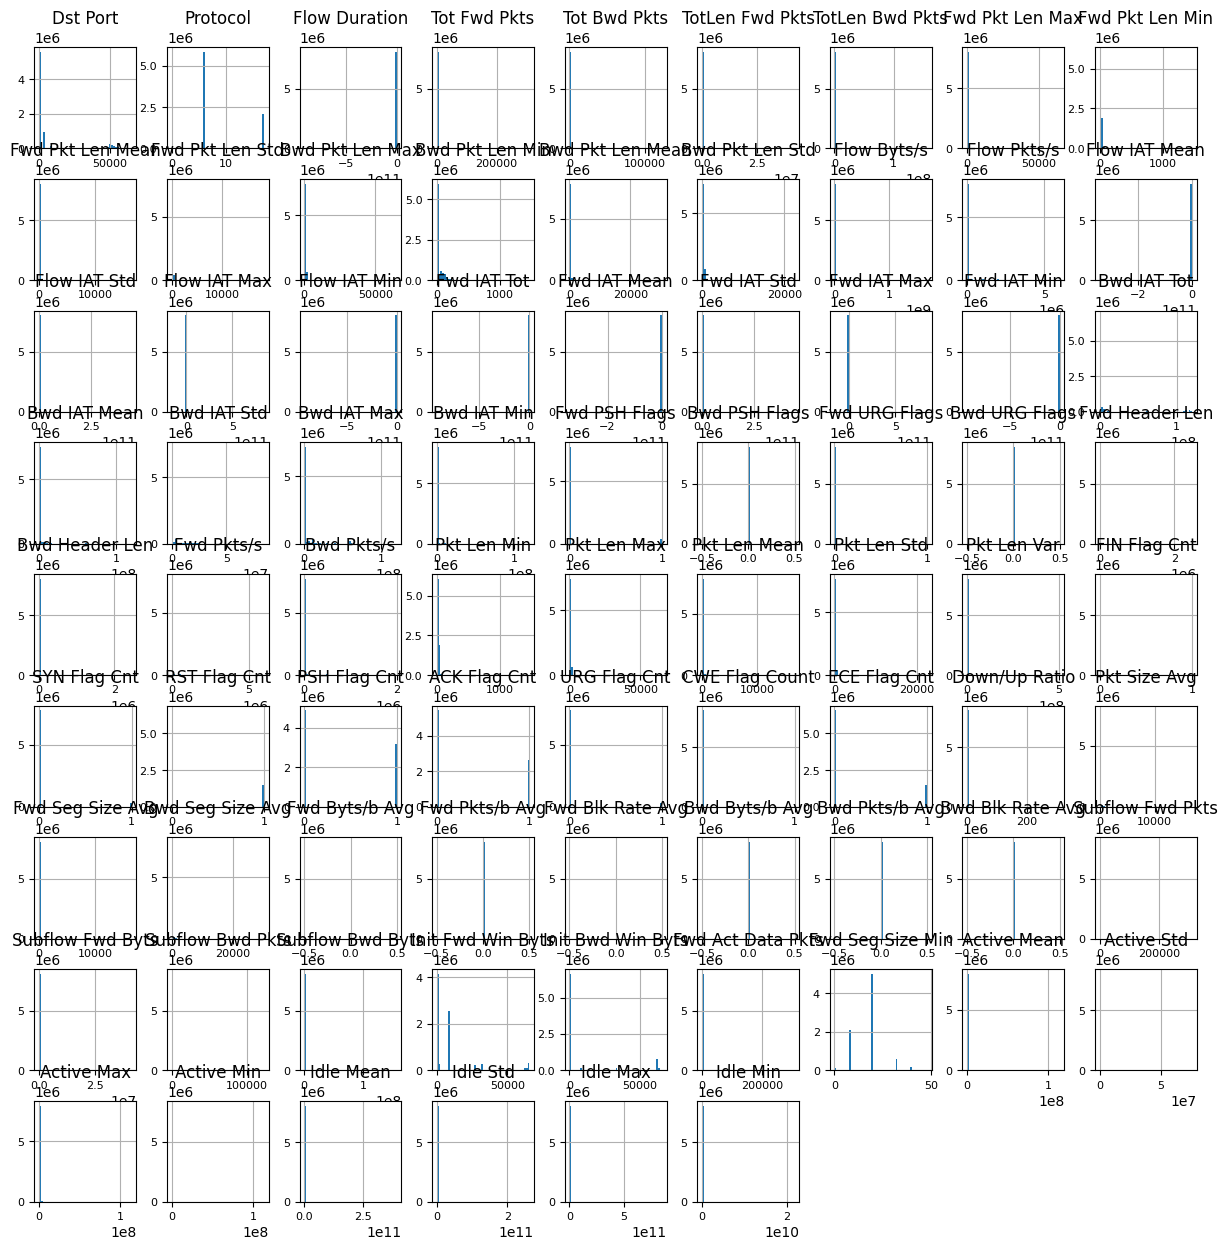

In [ ]:
#Visualizing Data Distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(figsize=(15, 15), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()


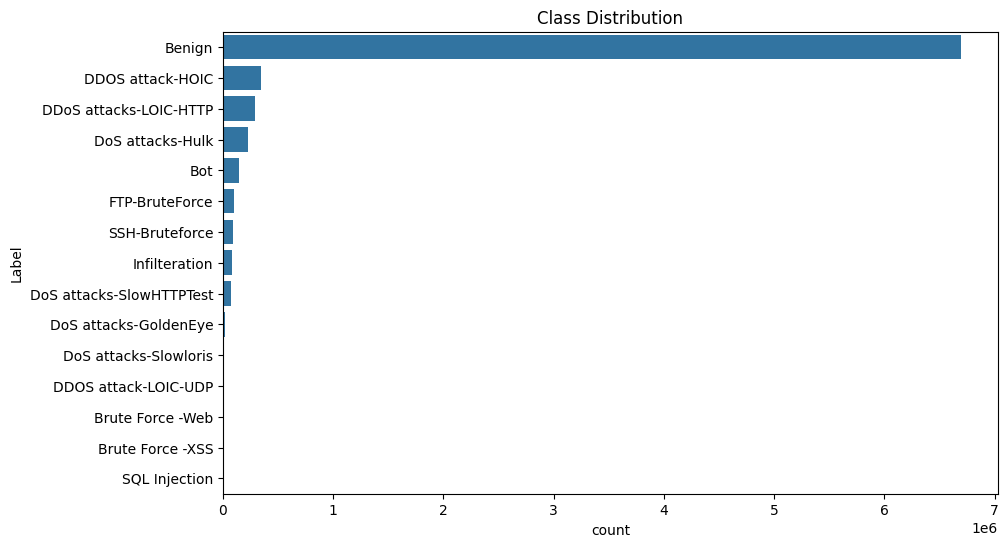

Label
Benign                      6695527
DDOS attack-HOIC             342988
DDoS attacks-LOIC-HTTP       288196
DoS attacks-Hulk             230648
Bot                          142864
FTP-BruteForce                96731
SSH-Bruteforce                93965
Infilteration                 80327
DoS attacks-SlowHTTPTest      69643
DoS attacks-GoldenEye         20864
DoS attacks-Slowloris          5529
DDOS attack-LOIC-UDP            895
Brute Force -Web                273
Brute Force -XSS                100
SQL Injection                    42
Name: count, dtype: int64


In [ ]:
# Plot class distribution - identify class imbalance
plt.figure(figsize=(10, 6))
sns.countplot(y='Label', data=df, order=df['Label'].value_counts().index)
plt.title('Class Distribution')
plt.show()

# Print class distribution
print(df['Label'].value_counts())


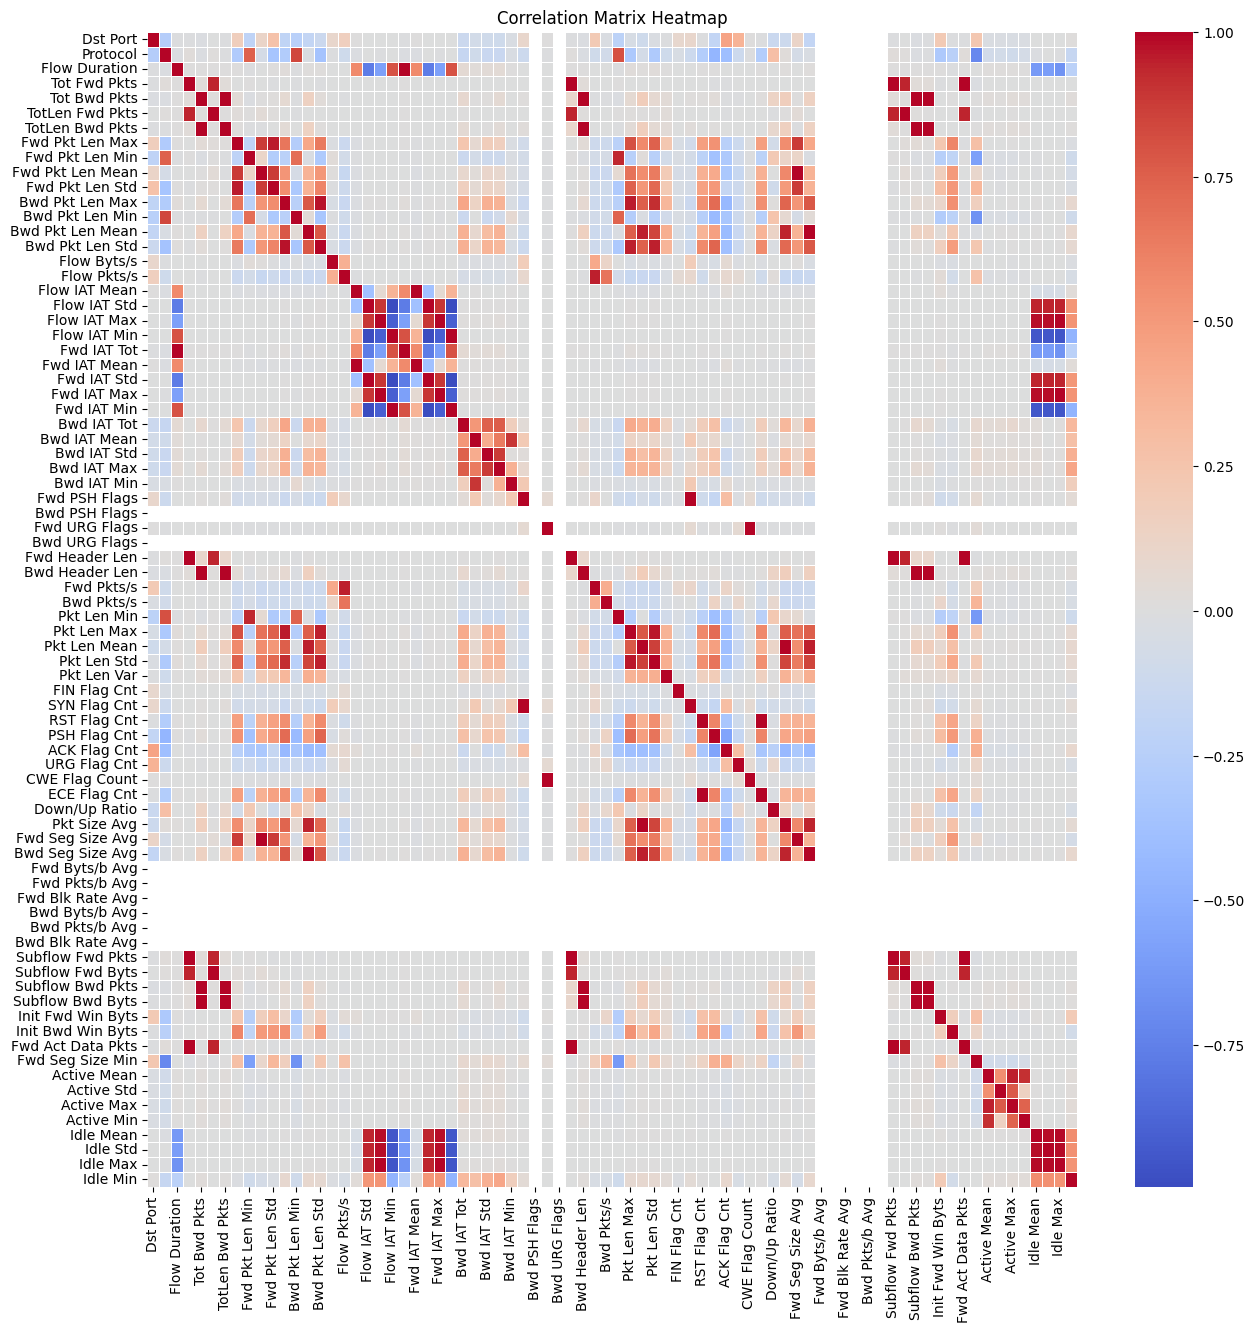

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation analysis, excluding the 'Label' column
corr_matrix = df.drop('Label', axis=1).corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [4]:
from sklearn.ensemble import RandomForestClassifier
#feature reduction
# Encode the Label column
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Number of features before selection
print(f"Total features before selection: {df.shape[1] - 1}")

# Subsampling the data to make the calculation faster
sample_size = 200000
df_sample = df.sample(n=sample_size, random_state=42)

# Separate features and target for the subsample
X_sample = df_sample.drop('Label', axis=1)
y_sample = df_sample['Label']

# Train a RandomForest to get feature importances
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_sample, y_sample)
feature_importances = pd.Series(clf.feature_importances_, index=X_sample.columns)

# Sort features by importance
feature_importances = feature_importances.sort_values(ascending=False)
print("Feature importances from subsample:")
print(feature_importances)

# Select features with importance greater than a threshold
threshold = 0.01
selected_features = feature_importances[feature_importances > threshold].index
print(f"Selected Features: {selected_features}")

# Reduce full dataset to the selected features
df_reduced = df[selected_features.to_list() + ['Label']]

# Print total number of features after selection
print(f"Total features after selection: {df_reduced.shape[1] - 1}")  #exculding label columns

# Separate features and target for full dataset
X = df_reduced.drop('Label', axis=1)
y = df_reduced['Label']


Total features before selection: 78
Feature importances from subsample:
Init Fwd Win Byts    0.095170
Dst Port             0.081770
Fwd Seg Size Min     0.064813
Fwd Header Len       0.038531
Flow Pkts/s          0.038458
                       ...   
Fwd Byts/b Avg       0.000000
Bwd Byts/b Avg       0.000000
Fwd Blk Rate Avg     0.000000
Bwd Pkts/b Avg       0.000000
Bwd Blk Rate Avg     0.000000
Length: 78, dtype: float64
Selected Features: Index(['Init Fwd Win Byts', 'Dst Port', 'Fwd Seg Size Min', 'Fwd Header Len',
       'Flow Pkts/s', 'Flow IAT Min', 'Flow Duration', 'Flow IAT Max',
       'TotLen Fwd Pkts', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Flow IAT Mean',
       'Fwd IAT Tot', 'Fwd IAT Max', 'Fwd IAT Min', 'Fwd Pkt Len Mean',
       'Fwd Seg Size Avg', 'Fwd Pkt Len Max', 'Subflow Fwd Byts', 'Bwd Pkts/s',
       'Init Bwd Win Byts', 'Subflow Fwd Pkts', 'Flow IAT Std', 'Flow Byts/s',
       'Pkt Len Max', 'Bwd Pkt Len Std', 'Bwd Pkt Len Mean'],
      dtype='object')
Total features 

In [ ]:
# Checking for missing values
#missing_values = df_reduced.isnull().sum()
#print("Missing values in each feature:")
#print(missing_values[missing_values > 0])

missing_values = df_reduced.isnull().sum()
if missing_values[missing_values > 0].empty:
    print("No missing values found in the selected features.")
else:
    print("Missing values in each feature:")
    print(missing_values[missing_values > 0])


No missing values found in the selected features.


In [5]:
# skiped as no missing values found
#threshold = len(df_reduced) * 0.5
#df_reduced = df_reduced.dropna(thresh=threshold, axis=1)
#df_reduced = df_reduced.fillna(df_reduced.median())

# Separated features and target after handling missing values
X = df_reduced.drop('Label', axis=1)
y = df_reduced['Label']

In [6]:
# Normalize/Standardize Numerical Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Original number of features: 27
Reduced number of features after PCA: 11
Class distribution before handling imbalance:
Label
0     1338539
4       69002
6       57624
8       46247
1       28589
11      19494
14      18915
12      15965
9       13800
7        4152
10       1121
5         194
2          50
3          17
13          9
Name: count, dtype: int64
Class distribution after handling imbalance:
Label
0     1338539
11    1338539
7     1338539
4     1338539
8     1338539
6     1338539
14    1338539
1     1338539
9     1338539
12    1338539
5     1338539
10    1338539
3     1338539
2     1338539
13    1338539
Name: count, dtype: int64


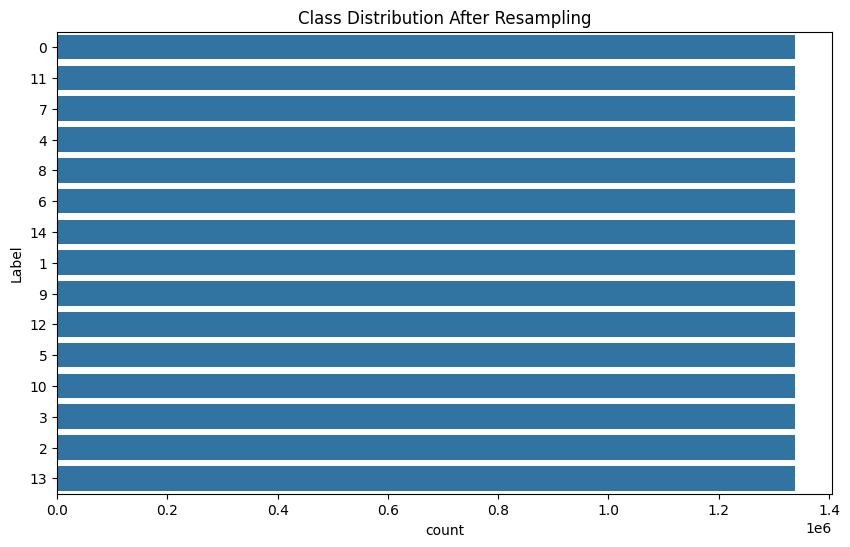

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Original number of features: {X_scaled.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca.shape[1]}")

# Before handling class imbalance
print("Class distribution before handling imbalance:")
print(y.value_counts())

# Handling class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

# After handling class imbalance
print("Class distribution after handling imbalance:")
print(pd.Series(y_resampled).value_counts())

# Visualize class distribution after resampling
plt.figure(figsize=(10, 6))
sns.countplot(y=y_resampled, order=pd.Series(y_resampled).value_counts().index)
plt.title('Class Distribution After Resampling')
plt.show()


###1.Dense Neural Network

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1251s 2ms/step - accuracy: 0.8697 - loss: 0.2506 - val_accuracy: 0.8811 - val_loss: 0.2174
Epoch 2/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1239s 2ms/step - accuracy: 0.8776 - loss: 0.2271 - val_accuracy: 0.8817 - val_loss: 0.2156
Epoch 3/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1249s 2ms/step - accuracy: 0.8787 - loss: 0.2244 - val_accuracy: 0.8821 - val_loss: 0.2147
Epoch 4/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1228s 2ms/step - accuracy: 0.8793 - loss: 0.2229 - val_accuracy: 0.8823 - val_loss: 0.2146
Epoch 5/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1266s 2ms/step - accuracy: 0.8797 - loss: 0.2219 - val_accuracy: 0.8841 - val_loss: 0.2132
Epoch 6/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1229s 2ms/step - accuracy: 0.8799 - loss: 0.2212 - val_accuracy: 0.8822 - val_loss: 0.2156
Epoch 7/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1240s 2ms/step - accuracy: 0.8802 -

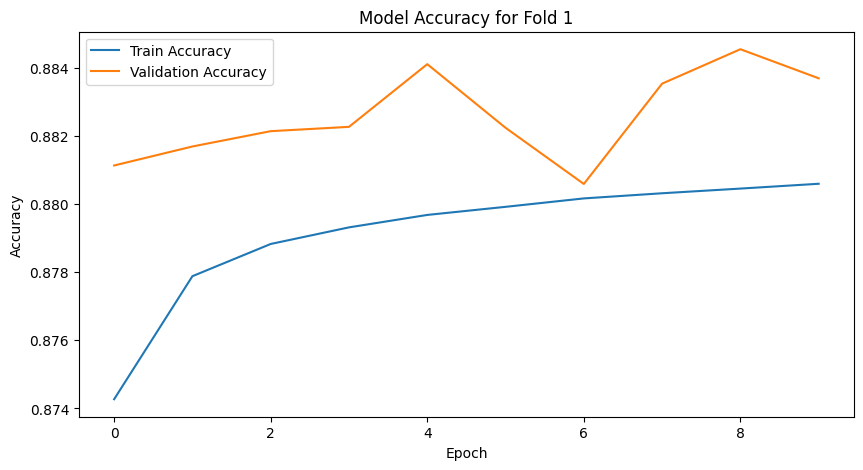

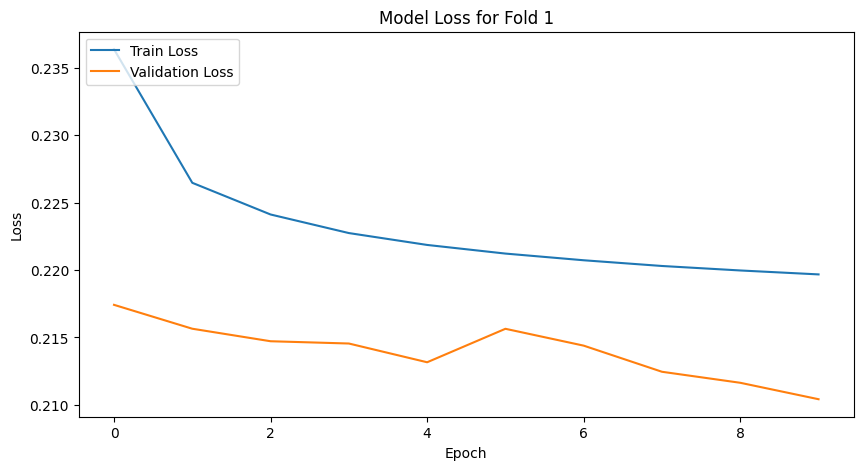

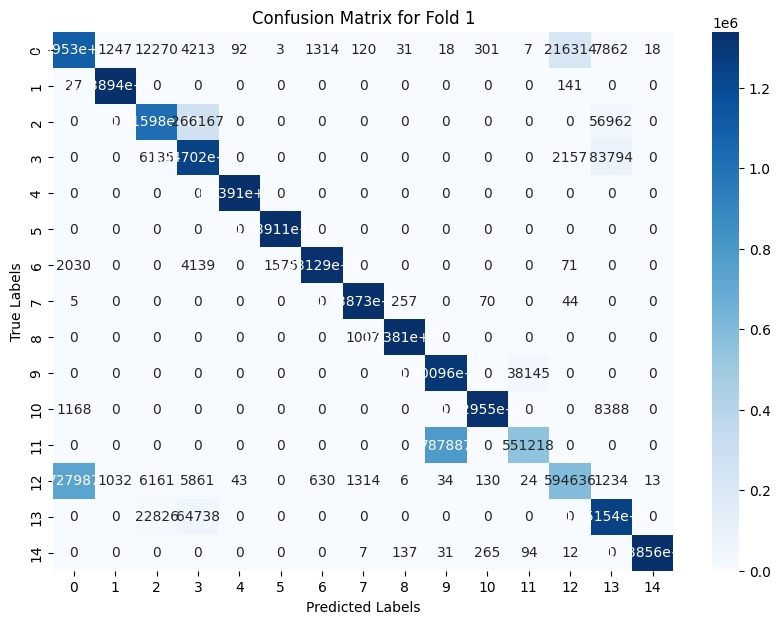

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1347s 2ms/step - accuracy: 0.8696 - loss: 0.2509 - val_accuracy: 0.8815 - val_loss: 0.2147
Epoch 2/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1372s 2ms/step - accuracy: 0.8777 - loss: 0.2269 - val_accuracy: 0.8805 - val_loss: 0.2159
Epoch 3/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1351s 2ms/step - accuracy: 0.8789 - loss: 0.2241 - val_accuracy: 0.8833 - val_loss: 0.2156
Epoch 4/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1375s 2ms/step - accuracy: 0.8794 - loss: 0.2228 - val_accuracy: 0.8829 - val_loss: 0.2141
Epoch 5/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1368s 2ms/step - accuracy: 0.8800 - loss: 0.2217 - val_accuracy: 0.8844 - val_loss: 0.2140
Epoch 6/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1366s 2ms/step - accuracy: 0.8802 - loss: 0.2208 - val_accuracy: 0.8828 - val_loss: 0.2149
Epoch 7/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1381s 2ms/step - accuracy: 0.8805 -

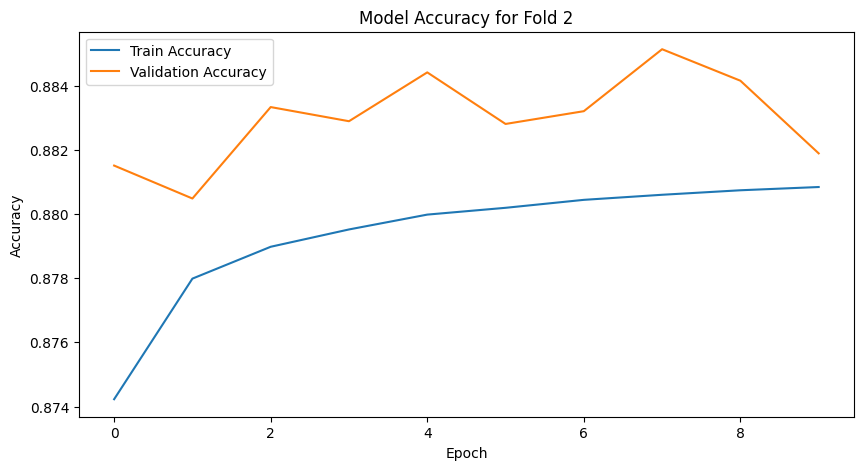

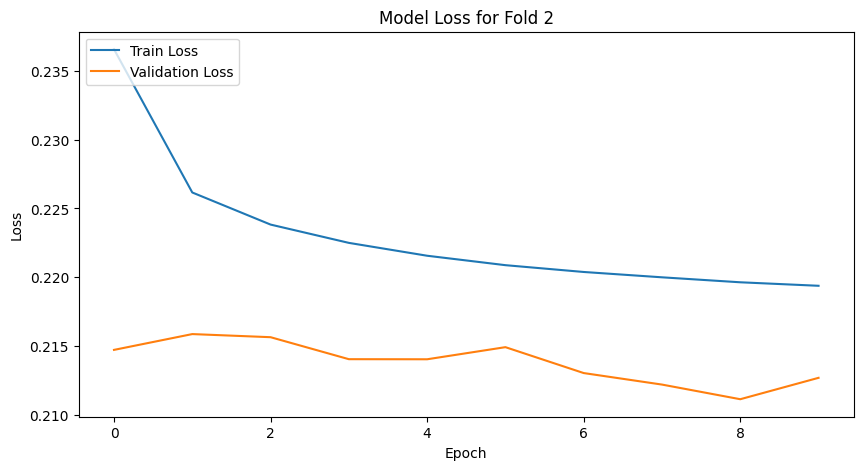

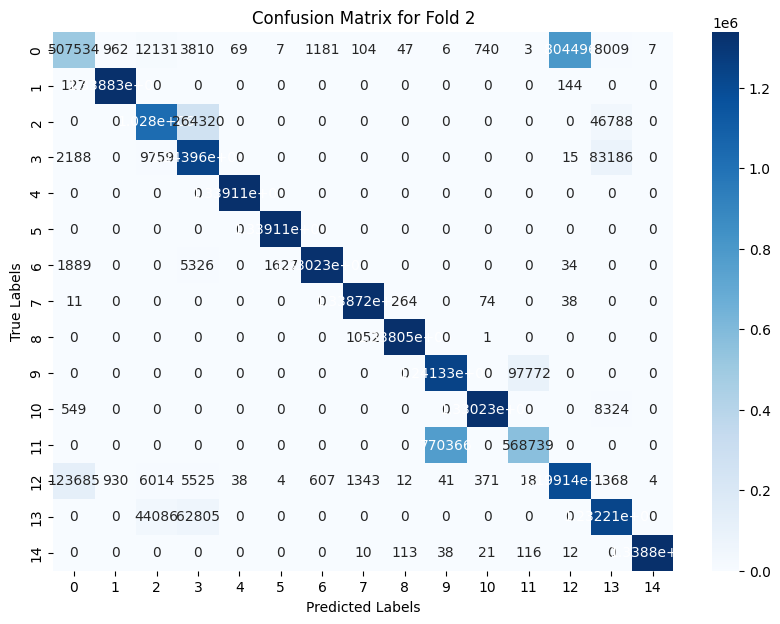

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1345s 2ms/step - accuracy: 0.8698 - loss: 0.2506 - val_accuracy: 0.8829 - val_loss: 0.2151
Epoch 2/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1336s 2ms/step - accuracy: 0.8777 - loss: 0.2267 - val_accuracy: 0.8825 - val_loss: 0.2145
Epoch 3/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1331s 2ms/step - accuracy: 0.8788 - loss: 0.2240 - val_accuracy: 0.8827 - val_loss: 0.2127
Epoch 4/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1370s 2ms/step - accuracy: 0.8794 - loss: 0.2227 - val_accuracy: 0.8838 - val_loss: 0.2133
Epoch 5/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1391s 2ms/step - accuracy: 0.8798 - loss: 0.2217 - val_accuracy: 0.8829 - val_loss: 0.2122
Epoch 6/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1397s 2ms/step - accuracy: 0.8800 - loss: 0.2212 - val_accuracy: 0.8835 - val_loss: 0.2122
Epoch 7/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1387s 2ms/step - accuracy: 0.8803 -

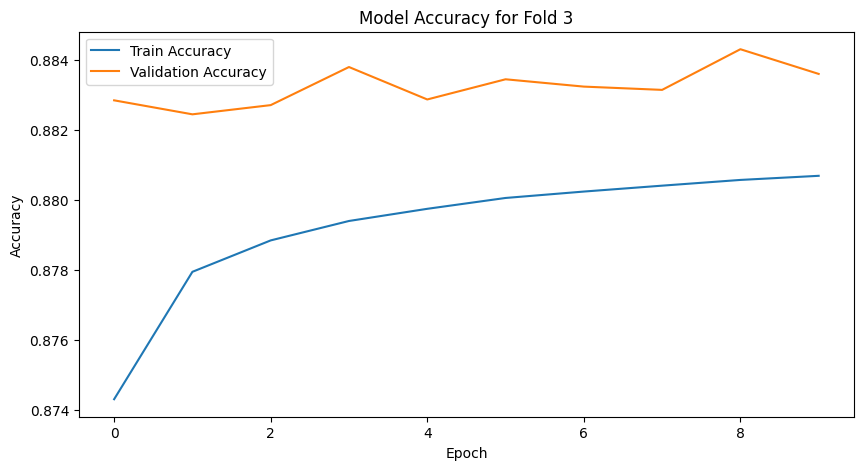

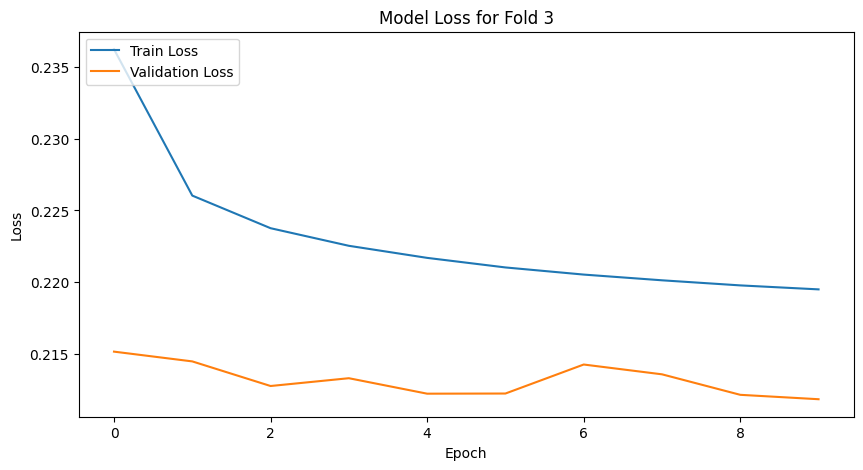

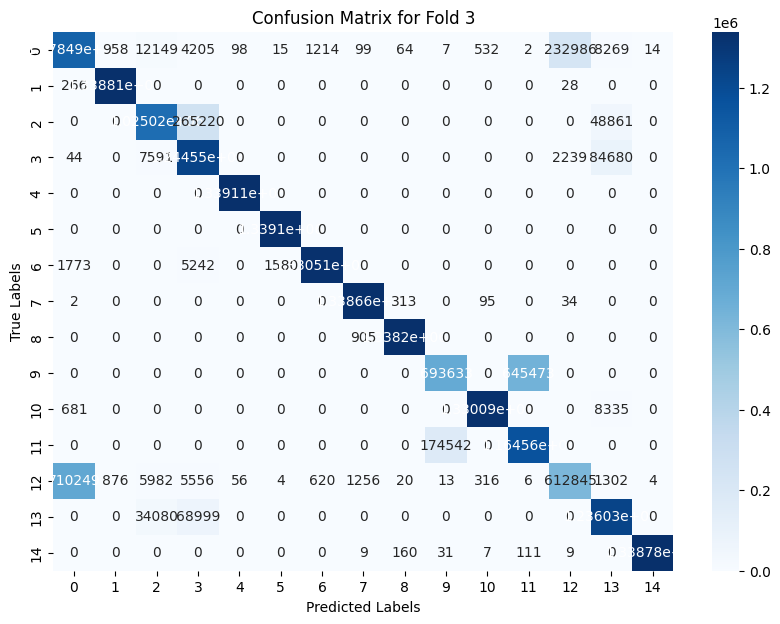

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1400s 2ms/step - accuracy: 0.8696 - loss: 0.2506 - val_accuracy: 0.8815 - val_loss: 0.2151
Epoch 2/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1365s 2ms/step - accuracy: 0.8777 - loss: 0.2268 - val_accuracy: 0.8817 - val_loss: 0.2157
Epoch 3/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1365s 2ms/step - accuracy: 0.8787 - loss: 0.2241 - val_accuracy: 0.8816 - val_loss: 0.2138
Epoch 4/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1387s 2ms/step - accuracy: 0.8794 - loss: 0.2228 - val_accuracy: 0.8821 - val_loss: 0.2137
Epoch 5/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1368s 2ms/step - accuracy: 0.8798 - loss: 0.2216 - val_accuracy: 0.8818 - val_loss: 0.2151
Epoch 6/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1371s 2ms/step - accuracy: 0.8802 - loss: 0.2208 - val_accuracy: 0.8824 - val_loss: 0.2135
Epoch 7/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1369s 2ms/step - accuracy: 0.8804 -

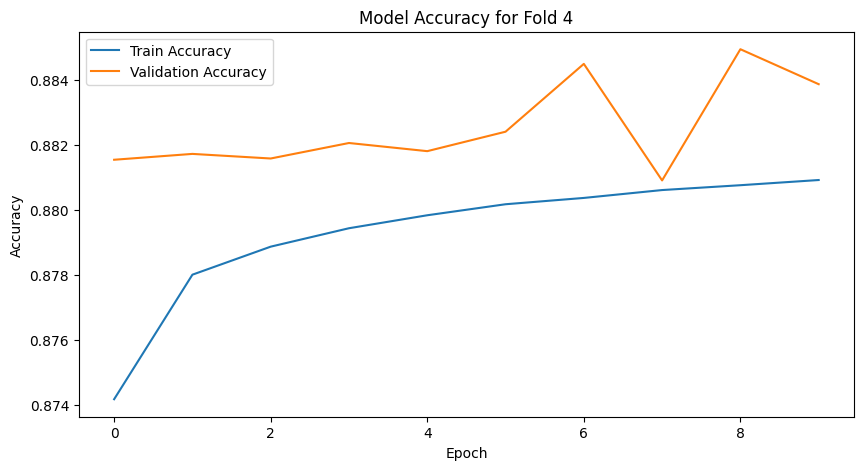

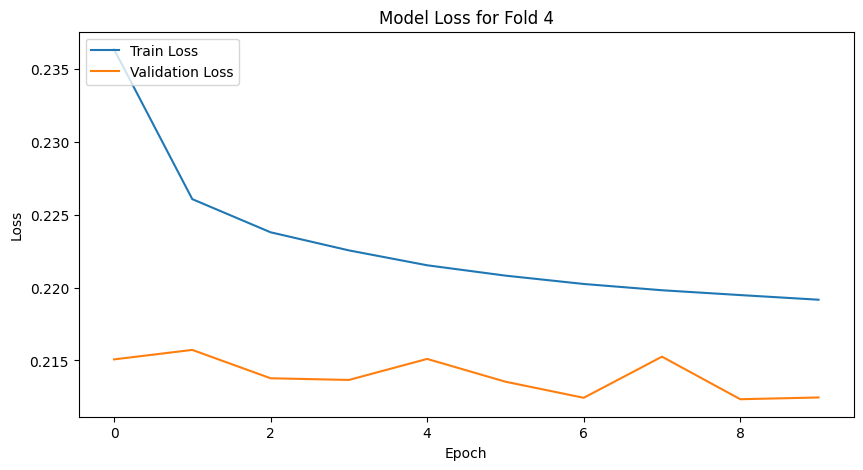

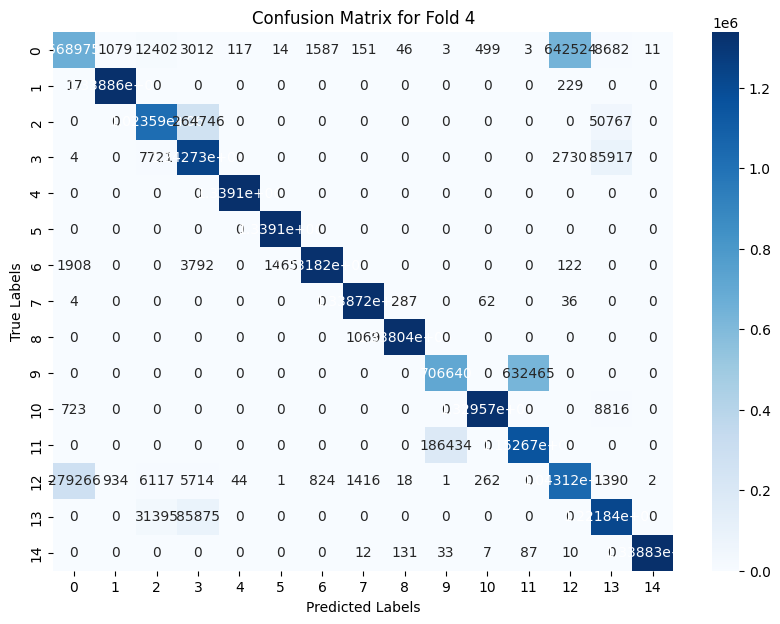

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1379s 2ms/step - accuracy: 0.8695 - loss: 0.2509 - val_accuracy: 0.8823 - val_loss: 0.2148
Epoch 2/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1377s 2ms/step - accuracy: 0.8775 - loss: 0.2269 - val_accuracy: 0.8806 - val_loss: 0.2143
Epoch 3/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1390s 2ms/step - accuracy: 0.8787 - loss: 0.2242 - val_accuracy: 0.8827 - val_loss: 0.2157
Epoch 4/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1397s 2ms/step - accuracy: 0.8793 - loss: 0.2227 - val_accuracy: 0.8821 - val_loss: 0.2133
Epoch 5/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1401s 2ms/step - accuracy: 0.8797 - loss: 0.2218 - val_accuracy: 0.8844 - val_loss: 0.2125
Epoch 6/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1400s 2ms/step - accuracy: 0.8800 - loss: 0.2210 - val_accuracy: 0.8821 - val_loss: 0.2148
Epoch 7/10
627706/627706 ━━━━━━━━━━━━━━━━━━━━ 1397s 2ms/step - accuracy: 0.8802 -

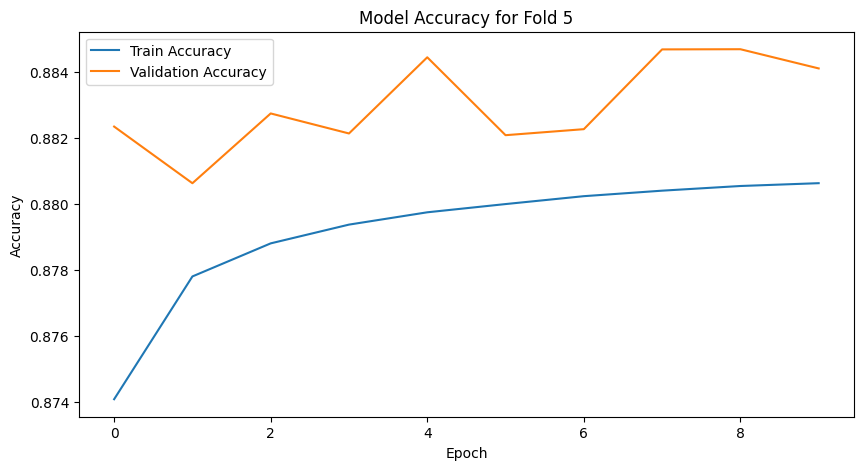

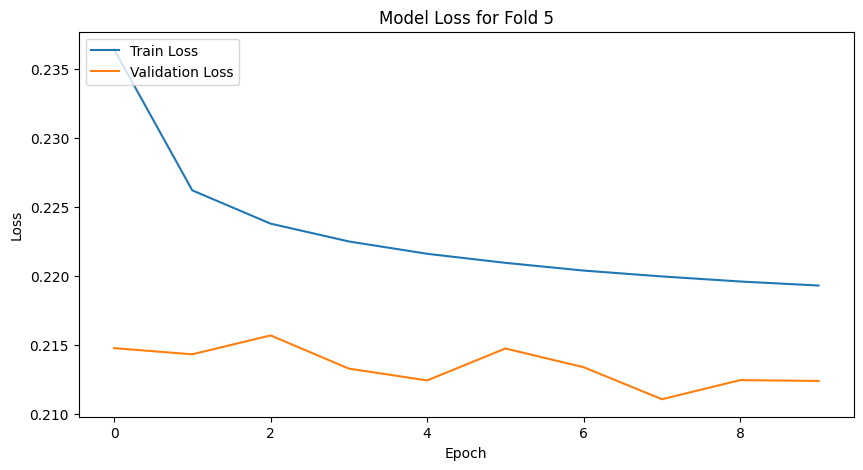

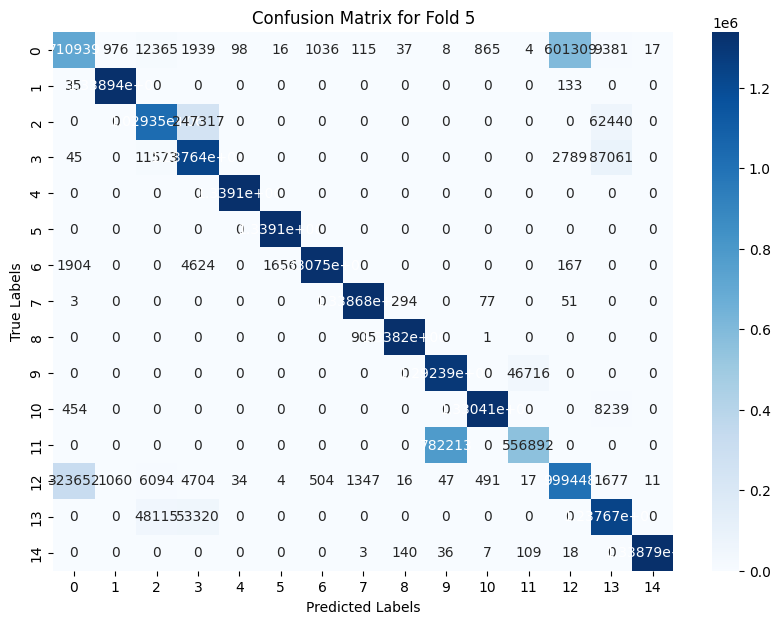

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.2102164477109909 - Accuracy: 88.36944699287415% - Precision: 0.9005231319805376 - Recall: 0.8836756738242312 - F1 Score: 0.8780981542016477 - ROC-AUC: 0.9376833964782174
------------------------------------------------------------------------
> Fold 2 - Loss: 0.21259081363677979 - Accuracy: 88.18928599357605% - Precision: 0.8980957274201017 - Recall: 0.8818819887764872 - F1 Score: 0.8752193604624903 - ROC-AUC: 0.9367224939512863
------------------------------------------------------------------------
> Fold 3 - Loss: 0.2116769552230835 - Accuracy: 88.36066722869873% - Precision: 0.8917701860709627 - Recall: 0.8835948238279078 - F1 Score: 0.8805173001711921 - ROC-AUC: 0.9376400842705758
------------------------------------------------------------------------
> Fold 4 - Loss: 0.21232810616493225 - Accuracy: 88.

In [ ]:
#Dense Neural Network (DNN)
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Initialize K-fold cross-validation
num_folds = 5
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# K-fold Cross Validation model evaluation
fold_no = 1
acc_per_fold = []
loss_per_fold = []

# lists for the mean scores
precision_per_fold = []
recall_per_fold = []
f1_score_per_fold = []
roc_auc_per_fold = []

for train, test in kfold.split(X_scaled, y_resampled):
    # model architecture
    model = Sequential([
        Dense(512, input_shape=(X_scaled.shape[1],)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),
        Dense(256),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),
        Dense(128),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),
        Dense(len(np.unique(y_resampled)), activation='softmax')
    ])

    # Compile
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    #  print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(X_scaled[train], y_resampled[train],
                        batch_size=128,
                        epochs=10,
                        verbose=1,
                        validation_data=(X_scaled[test], y_resampled[test]))

    # generalization metrics
    scores = model.evaluate(X_scaled[test], y_resampled[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Predictions for metrics
    predictions = model.predict(X_scaled[test])
    y_pred = np.argmax(predictions, axis=1)

    # Calculate precision, recall, F1-score, and ROC-AUC
    precision = precision_score(y_resampled[test], y_pred, average='weighted')
    recall = recall_score(y_resampled[test], y_pred, average='weighted')
    f1 = f1_score(y_resampled[test], y_pred, average='weighted')
    roc_auc = roc_auc_score(tf.keras.utils.to_categorical(y_resampled[test]), tf.keras.utils.to_categorical(y_pred), multi_class='ovr', average='weighted')
    conf_matrix = confusion_matrix(y_resampled[test], y_pred)

    print("Confusion Matrix:")
    print(conf_matrix)

    # per-fold score
    precision_per_fold.append(precision)
    recall_per_fold.append(recall)
    f1_score_per_fold.append(f1)
    roc_auc_per_fold.append(roc_auc)

    # Plotting training & validation accuracy values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy for Fold {}'.format(fold_no))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Plotting training & validation loss values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss for Fold {}'.format(fold_no))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Enhanced Confusion Matrix Visualization
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix for Fold {}'.format(fold_no))
    plt.show()

    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}% - Precision: {precision_per_fold[i]} - Recall: {recall_per_fold[i]} - F1 Score: {f1_score_per_fold[i]} - ROC-AUC: {roc_auc_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> Precision: {np.mean(precision_per_fold)}')
print(f'> Recall: {np.mean(recall_per_fold)}')
print(f'> F1 Score: {np.mean(f1_score_per_fold)}')
print(f'> ROC-AUC: {np.mean(roc_auc_per_fold)}')
print('------------------------------------------------------------------------')


##Complex Regularized Model

In [ ]:
#Complex_Regularized_Model_with_KFold_Validation
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# K-fold cross-validation
num_folds = 2
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Storage for the fold results
fold_no = 1
acc_per_fold = []
loss_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_score_per_fold = []
roc_auc_per_fold = []
conf_matrices = []

for train, test in kfold.split(X_scaled, y_resampled):
    # Model architecture
    model = Sequential(name="Complex_Regularized_Model_with_KFold_Validation")
    model.add(Input(shape=(X_scaled.shape[1],)))
    model.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(len(np.unique(y_resampled)), activation='softmax'))

    # Compile
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_fold{fold_no}.keras', monitor='val_loss', save_best_only=True, verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

    # Fit data to model
    history = model.fit(X_scaled[train], y_resampled[train],
                        batch_size=64,
                        epochs=20,
                        verbose=1,
                        validation_data=(X_scaled[test], y_resampled[test]),
                        callbacks=[early_stopping, model_checkpoint, reduce_lr])

    # Generalization metrics
    scores = model.evaluate(X_scaled[test], y_resampled[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Prediction and scoring
    y_pred = np.argmax(model.predict(X_scaled[test]), axis=1)
    precision = precision_score(y_resampled[test], y_pred, average='weighted')
    recall = recall_score(y_resampled[test], y_pred, average='weighted')
    f1 = f1_score(y_resampled[test], y_pred, average='weighted')
    roc_auc = roc_auc_score(tf.keras.utils.to_categorical(y_resampled[test]), tf.keras.utils.to_categorical(y_pred), average='weighted')

    precision_per_fold.append(precision)
    recall_per_fold.append(recall)
    f1_score_per_fold.append(f1)
    roc_auc_per_fold.append(roc_auc)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_resampled[test], y_pred)
    conf_matrices.append(conf_matrix)

    # Plotting training & validation accuracy values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy for Fold {fold_no}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Plotting training & validation loss values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss for Fold {fold_no}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Enhanced Confusion Matrix Visualization
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_resampled), yticklabels=np.unique(y_resampled))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.show()

    fold_no += 1

# Average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}% - Precision: {precision_per_fold[i]} - Recall: {recall_per_fold[i]} - F1 Score: {f1_score_per_fold[i]} - ROC-AUC: {roc_auc_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> Precision: {np.mean(precision_per_fold)}')
print(f'> Recall: {np.mean(recall_per_fold)}')
print(f'> F1 Score: {np.mean(f1_score_per_fold)}')
print(f'> ROC-AUC: {np.mean(roc_auc_per_fold)}')
print('------------------------------------------------------------------------')


Epoch 1/20
784633/784633 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8488 - loss: 0.4202
Epoch 1: val_loss improved from inf to 0.33351, saving model to best_model_fold1.keras
784633/784633 ━━━━━━━━━━━━━━━━━━━━ 1985s 3ms/step - accuracy: 0.8488 - loss: 0.4202 - val_accuracy: 0.8686 - val_loss: 0.3335 - learning_rate: 0.0010
Epoch 2/20
784608/784633 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8545 - loss: 0.3807
Epoch 2: val_loss did not improve from 0.33351
784633/784633 ━━━━━━━━━━━━━━━━━━━━ 1975s 3ms/step - accuracy: 0.8545 - loss: 0.3807 - val_accuracy: 0.8579 - val_loss: 0.3521 - learning_rate: 0.0010
Epoch 3/20
784628/784633 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8539 - loss: 0.3809
Epoch 3: val_loss improved from 0.33351 to 0.33263, saving model to best_model_fold1.keras
784633/784633 ━━━━━━━━━━━━━━━━━━━━ 1967s 3ms/step - accuracy: 0.8539 - loss: 0.3809 - val_accuracy: 0.8685 - val_loss: 0.3326 - learning_rate: 0.0010
Epoch 4/20
784623/784633 ━━━━━━━━━━━━━━━━━━━━ 0s 

##LSTM Model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1176949/1176949 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8763 - loss: 0.2347
Epoch 1: val_loss improved from inf to 0.18254, saving model to best_lstm_model_fold1.keras
1176949/1176949 ━━━━━━━━━━━━━━━━━━━━ 5887s 5ms/step - accuracy: 0.8763 - loss: 0.2347 - val_accuracy: 0.8963 - val_loss: 0.1825 - learning_rate: 0.0010
Epoch 2/10
1176946/1176949 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8914 - loss: 0.1920
Epoch 2: val_loss improved from 0.18254 to 0.17645, saving model to best_lstm_model_fold1.keras
1176949/1176949 ━━━━━━━━━━━━━━━━━━━━ 5794s 5ms/step - accuracy: 0.8914 - loss: 0.1920 - val_accuracy: 0.8990 - val_loss: 0.1764 - learning_rate: 0.0010
Epoch 3/10
1176942/1176949 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8941 - loss: 0.1863
Epoch 3: val_loss improved from 0.17645 to 0.17332, saving model to best_lstm_model_fold1.keras
1176949/1176949 ━━━━━━━━━━━━━━━━━━━━ 5770s 5ms/step - accuracy: 0.8941 - loss: 0.1863 - val_accuracy: 0.9002 - val_loss: 0.1733 - 

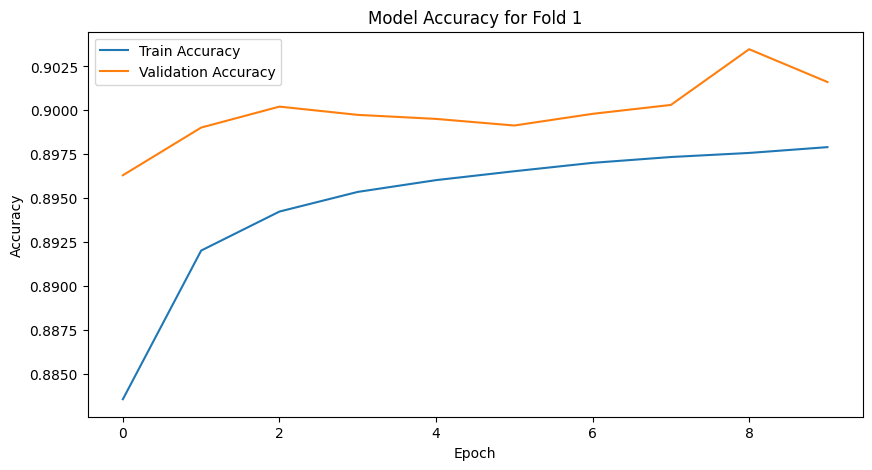

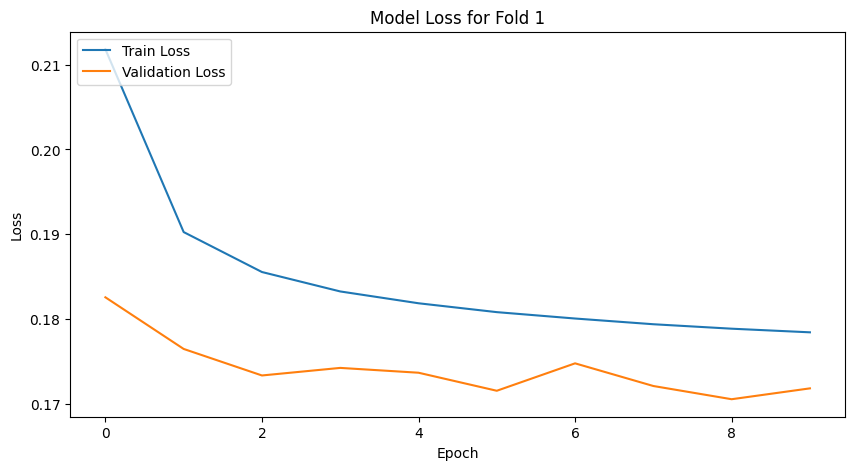

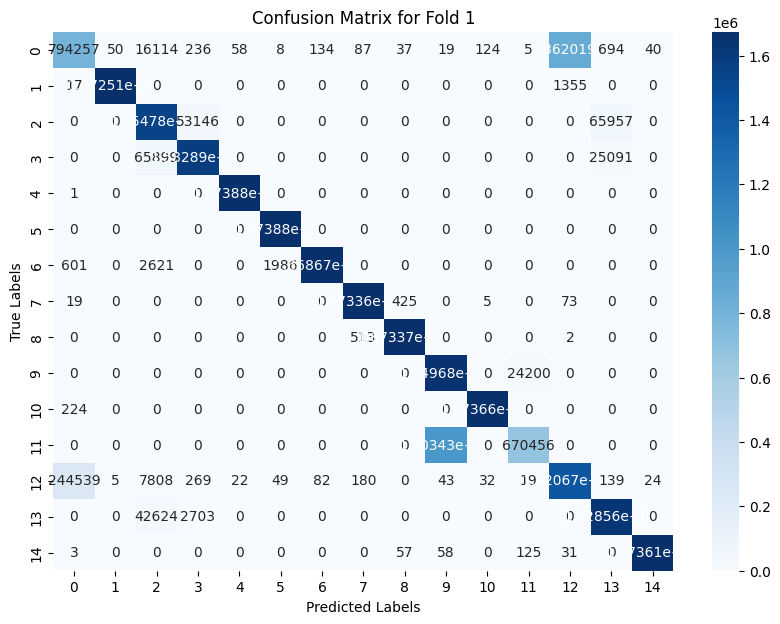

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1176949/1176949 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8765 - loss: 0.2341
Epoch 1: val_loss improved from inf to 0.18086, saving model to best_lstm_model_fold2.keras
1176949/1176949 ━━━━━━━━━━━━━━━━━━━━ 6102s 5ms/step - accuracy: 0.8765 - loss: 0.2341 - val_accuracy: 0.8965 - val_loss: 0.1809 - learning_rate: 0.0010
Epoch 2/10
1176944/1176949 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8910 - loss: 0.1925
Epoch 2: val_loss improved from 0.18086 to 0.17378, saving model to best_lstm_model_fold2.keras
1176949/1176949 ━━━━━━━━━━━━━━━━━━━━ 6135s 5ms/step - accuracy: 0.8910 - loss: 0.1925 - val_accuracy: 0.8982 - val_loss: 0.1738 - learning_rate: 0.0010
Epoch 3/10
1176949/1176949 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8940 - loss: 0.1867
Epoch 3: val_loss did not improve from 0.17378
1176949/1176949 ━━━━━━━━━━━━━━━━━━━━ 6283s 5ms/step - accuracy: 0.8940 - loss: 0.1867 - val_accuracy: 0.8976 - val_loss: 0.1741 - learning_rate: 0.0010
Epoch 4/10
1104488/1176949 

In [ ]:
#LSTM_Model_with_KFold_Validation
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
X_resampled_lstm = X_resampled.reshape((X_resampled.shape[0], 1, X_resampled.shape[1]))

# Initialize K-fold cross-validation
num_folds = 4
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

fold_no = 1
acc_per_fold = []
loss_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_score_per_fold = []
roc_auc_per_fold = []
conf_matrices = []

for train, test in kfold.split(X_resampled_lstm, y_resampled):
    # LSTM model architecture
    lstm_model = Sequential(name="Complex_LSTM_Model_with_KFold_Validation")
    lstm_model.add(LSTM(128, input_shape=(1, X_resampled.shape[1]), return_sequences=True))
    lstm_model.add(Dropout(0.3))
    lstm_model.add(LSTM(64))
    lstm_model.add(Dropout(0.3))
    lstm_model.add(Dense(len(np.unique(y_resampled)), activation='softmax'))

    # Compile
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    lstm_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_lstm_model_fold{fold_no}.keras', monitor='val_loss', save_best_only=True, verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

    # Fit data to model
    history = lstm_model.fit(X_resampled_lstm[train], y_resampled[train],
                             batch_size=64,
                             epochs=10,
                             validation_data=(X_resampled_lstm[test], y_resampled[test]),
                             callbacks=[early_stopping, model_checkpoint, reduce_lr])

    # Evaluate the model
    scores = lstm_model.evaluate(X_resampled_lstm[test], y_resampled[test], verbose=0)
    print(f'Score for fold {fold_no}: {lstm_model.metrics_names[0]} of {scores[0]}; {lstm_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Predictions and metrics
    y_pred = np.argmax(lstm_model.predict(X_resampled_lstm[test]), axis=1)
    precision = precision_score(y_resampled[test], y_pred, average='weighted')
    recall = recall_score(y_resampled[test], y_pred, average='weighted')
    f1 = f1_score(y_resampled[test], y_pred, average='weighted')
    roc_auc = roc_auc_score(tf.keras.utils.to_categorical(y_resampled[test]), tf.keras.utils.to_categorical(y_pred), multi_class='ovr')

    precision_per_fold.append(precision)
    recall_per_fold.append(recall)
    f1_score_per_fold.append(f1)
    roc_auc_per_fold.append(roc_auc)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_resampled[test], y_pred)
    conf_matrices.append(conf_matrix)

    # Plotting training & validation accuracy values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy for Fold {fold_no}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Plotting training & validation loss values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss for Fold {fold_no}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Enhanced Confusion Matrix Visualization
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_resampled), yticklabels=np.unique(y_resampled))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.show()

    fold_no += 1

#  Average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}% - Precision: {precision_per_fold[i]} - Recall: {recall_per_fold[i]} - F1 Score: {f1_score_per_fold[i]} - ROC-AUC: {roc_auc_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> Precision: {np.mean(precision_per_fold)}')
print(f'> Recall: {np.mean(recall_per_fold)}')
print(f'> F1 Score: {np.mean(f1_score_per_fold)}')
print(f'> ROC-AUC: {np.mean(roc_auc_per_fold)}')
print('------------------------------------------------------------------------')


###GRU Model

In [ ]:
#GRU Model
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Reshape data for GRU: (samples, timesteps, features)
X_scaled_gru = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Initialize K-fold cross-validation
num_folds = 3
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Prepare storage for the fold results
fold_no = 1
acc_per_fold = []
loss_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_score_per_fold = []
roc_auc_per_fold = []
conf_matrices = []

for train, test in kfold.split(X_scaled_gru, y_resampled):
    #GRU model architecture
    model = Sequential(name="GRU_Model_with_KFold_Validation")
    model.add(GRU(128, return_sequences=True, input_shape=(X_scaled_gru.shape[1], X_scaled_gru.shape[2])))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(GRU(64))
    model.add(Dropout(0.3))
    model.add(Dense(len(np.unique(y_resampled)), activation='softmax'))

    # Compile
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_gru_model_fold{fold_no}.keras', monitor='val_loss', save_best_only=True, verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

    # Fit data to model
    history = model.fit(X_scaled_gru[train], y_resampled[train],
                        batch_size=64,
                        epochs=10,
                        verbose=1,
                        validation_data=(X_scaled_gru[test], y_resampled[test]),
                        callbacks=[early_stopping, model_checkpoint, reduce_lr])

    # Evaluate the model
    scores = model.evaluate(X_scaled_gru[test], y_resampled[test], verbose=0)
    print(f'Score for fold {fold_no}: Accuracy of {scores[1]*100:.2f}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Predictions and metrics
    y_pred = np.argmax(model.predict(X_scaled_gru[test]), axis=1)
    precision = precision_score(y_resampled[test], y_pred, average='weighted')
    recall = recall_score(y_resampled[test], y_pred, average='weighted')
    f1 = f1_score(y_resampled[test], y_pred, average='weighted')
    roc_auc = roc_auc_score(tf.keras.utils.to_categorical(y_resampled[test]), tf.keras.utils.to_categorical(y_pred), average='weighted')

    precision_per_fold.append(precision)
    recall_per_fold.append(recall)
    f1_score_per_fold.append(f1)
    roc_auc_per_fold.append(roc_auc)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_resampled[test], y_pred)
    conf_matrices.append(conf_matrix)

    # Plotting training & validation accuracy values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy for Fold {fold_no}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Plotting training & validation loss values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss for Fold {fold_no}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Enhanced Confusion Matrix Visualization
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.show()

    fold_no += 1

# Average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}% - Precision: {precision_per_fold[i]} - Recall: {recall_per_fold[i]} - F1 Score: {f1_score_per_fold[i]} - ROC-AUC: {roc_auc_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold):.2f}% (+- {np.std(acc_per_fold):.2f}%)')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> Precision: {np.mean(precision_per_fold)}')
print(f'> Recall: {np.mean(recall_per_fold)}')
print(f'> F1 Score: {np.mean(f1_score_per_fold)}')
print(f'> ROC-AUC: {np.mean(roc_auc_per_fold)}')
print('------------------------------------------------------------------------')


NameError: name 'X_resampled' is not defined

###Bidirectional LSTM Model

Training for fold 1 ...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
588475/588475 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8721 - loss: 0.2478
Epoch 1: val_loss improved from inf to 0.20003, saving model to best_lstm_model_fold1.keras
588475/588475 ━━━━━━━━━━━━━━━━━━━━ 4825s 8ms/step - accuracy: 0.8721 - loss: 0.2478 - val_accuracy: 0.8860 - val_loss: 0.2000 - learning_rate: 5.0000e-04
Epoch 2/10
588475/588475 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8849 - loss: 0.2082
Epoch 2: val_loss improved from 0.20003 to 0.19635, saving model to best_lstm_model_fold1.keras
588475/588475 ━━━━━━━━━━━━━━━━━━━━ 4891s 8ms/step - accuracy: 0.8849 - loss: 0.2082 - val_accuracy: 0.8892 - val_loss: 0.1963 - learning_rate: 5.0000e-04
Epoch 3/10
588471/588475 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8863 - loss: 0.2043
Epoch 3: val_loss improved from 0.19635 to 0.19368, saving model to best_lstm_model_fold1.keras
588475/588475 ━━━━━━━━━━━━━━━━━━━━ 4946s 8ms/step - accuracy: 0.8863 - loss: 0.2043 - val_accuracy: 0.8892 - val_loss: 0.1937 - lear

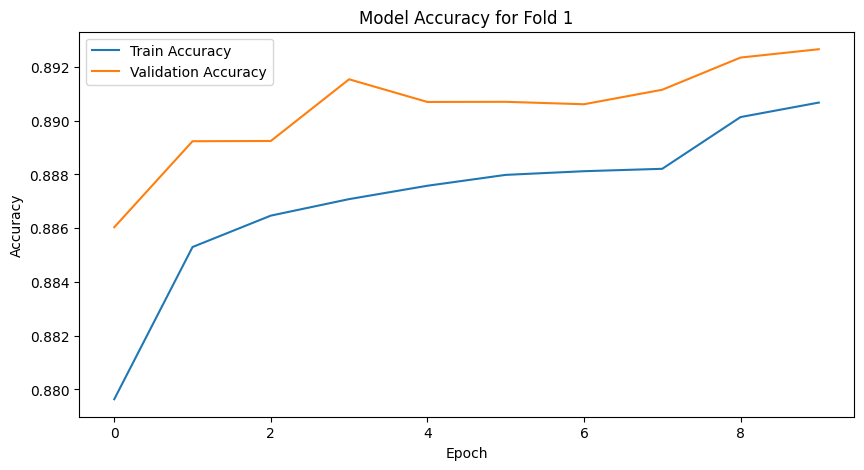

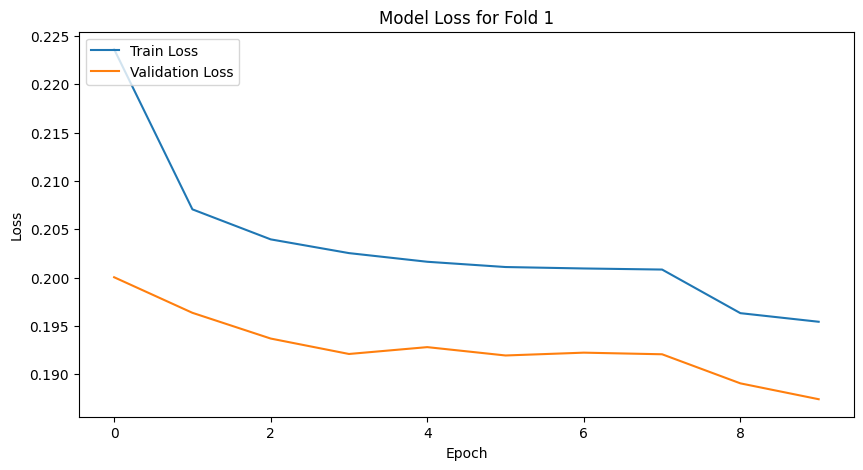

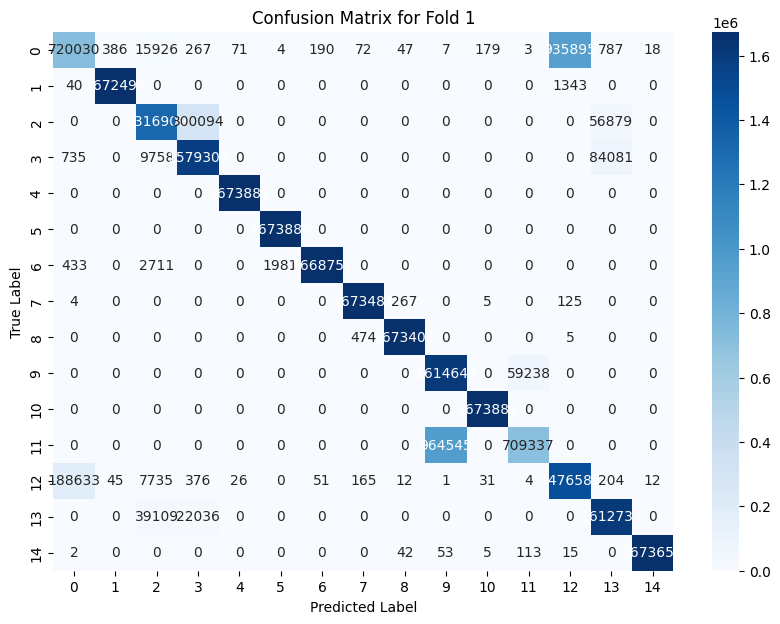

Training for fold 2 ...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
588475/588475 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8721 - loss: 0.2477
Epoch 1: val_loss improved from inf to 0.20036, saving model to best_lstm_model_fold2.keras
588475/588475 ━━━━━━━━━━━━━━━━━━━━ 5234s 9ms/step - accuracy: 0.8721 - loss: 0.2477 - val_accuracy: 0.8869 - val_loss: 0.2004 - learning_rate: 5.0000e-04
Epoch 2/10
588469/588475 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8850 - loss: 0.2079
Epoch 2: val_loss improved from 0.20036 to 0.19451, saving model to best_lstm_model_fold2.keras
588475/588475 ━━━━━━━━━━━━━━━━━━━━ 5289s 9ms/step - accuracy: 0.8850 - loss: 0.2079 - val_accuracy: 0.8901 - val_loss: 0.1945 - learning_rate: 5.0000e-04
Epoch 3/10
588472/588475 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8866 - loss: 0.2038
Epoch 3: val_loss improved from 0.19451 to 0.19371, saving model to best_lstm_model_fold2.keras
588475/588475 ━━━━━━━━━━━━━━━━━━━━ 5371s 9ms/step - accuracy: 0.8866 - loss: 0.2038 - val_accuracy: 0.8901 - val_loss: 0.1937 - lear

In [ ]:
#Bidirectional_LSTM_Model_with_KFold_Validation
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
X_resampled_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Initialize K-fold cross-validation
num_folds = 3
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Prepare storage for the fold results
fold_no = 1
acc_per_fold = []
loss_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_score_per_fold = []
roc_auc_per_fold = []
conf_matrices = []

for train, test in kfold.split(X_resampled_lstm, y_resampled):
    print(f'Training for fold {fold_no} ...')

    # LSTM model definition
    model = Sequential(name="Bidirectional_LSTM_Model_with_KFold_Validation")
    model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=(X_resampled_lstm.shape[1], X_resampled_lstm.shape[2])))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(64))
    model.add(Dropout(0.4))
    model.add(Dense(len(np.unique(y_resampled)), activation='softmax'))

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)  # Lowered learning rate
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_lstm_model_fold{fold_no}.keras', monitor='val_loss', save_best_only=True, verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001)

    # Training
    history = model.fit(X_resampled_lstm[train], y_resampled[train], epochs=10, batch_size=128,
                        validation_data=(X_resampled_lstm[test], y_resampled[test]),
                        callbacks=[early_stopping, model_checkpoint, reduce_lr])

    # Evaluation
    scores = model.evaluate(X_resampled_lstm[test], y_resampled[test], verbose=0)
    print(f'Score for fold {fold_no}: Accuracy of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Predictions
    y_pred = np.argmax(model.predict(X_resampled_lstm[test]), axis=1)

    # Metrics
    precision = precision_score(y_resampled[test], y_pred, average='weighted')
    recall = recall_score(y_resampled[test], y_pred, average='weighted')
    f1 = f1_score(y_resampled[test], y_pred, average='weighted')
    roc_auc = roc_auc_score(tf.keras.utils.to_categorical(y_resampled[test]), tf.keras.utils.to_categorical(y_pred), average='weighted', multi_class='ovr')

    precision_per_fold.append(precision)
    recall_per_fold.append(recall)
    f1_score_per_fold.append(f1)
    roc_auc_per_fold.append(roc_auc)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_resampled[test], y_pred)
    conf_matrices.append(conf_matrix)

    # Plotting training & validation accuracy values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy for Fold {fold_no}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Plotting training & validation loss values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss for Fold {fold_no}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Enhanced Confusion Matrix Visualization
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_resampled), yticklabels=np.unique(y_resampled))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.show()

    fold_no += 1

#AVG Scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
    print(f'           Precision: {precision_per_fold[i]:.4f} - Recall: {recall_per_fold[i]:.4f}')
    print(f'           F1 Score: {f1_score_per_fold[i]:.4f} - ROC-AUC: {roc_auc_per_fold[i]:.4f}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold):.2f}% (+- {np.std(acc_per_fold):.2f}%)')
print(f'> Loss: {np.mean(loss_per_fold):.4f}')
print(f'> Precision: {np.mean(precision_per_fold)::.4f}')
print(f'> Recall: {np.mean(recall_per_fold):.4f}')
print(f'> F1 Score: {np.mean(f1_score_per_fold):.4f}')
print(f'> ROC-AUC: {np.mean(roc_auc_per_fold):.4f}')
print('------------------------------------------------------------------------')


###Stacked Ensemble Model


------------------------------------------------------------------------
Training for fold 1 ...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
313721/313721 ━━━━━━━━━━━━━━━━━━━━ 2120s 7ms/step - accuracy: 0.8595 - loss: 0.2890 - val_accuracy: 0.8850 - val_loss: 0.1987 - learning_rate: 0.0010
Epoch 2/5
313721/313721 ━━━━━━━━━━━━━━━━━━━━ 2131s 7ms/step - accuracy: 0.8794 - loss: 0.2155 - val_accuracy: 0.8865 - val_loss: 0.1950 - learning_rate: 0.0010
Epoch 3/5
313721/313721 ━━━━━━━━━━━━━━━━━━━━ 2140s 7ms/step - accuracy: 0.8825 - loss: 0.2088 - val_accuracy: 0.8915 - val_loss: 0.1891 - learning_rate: 0.0010
Epoch 4/5
313721/313721 ━━━━━━━━━━━━━━━━━━━━ 2134s 7ms/step - accuracy: 0.8840 - loss: 0.2051 - val_accuracy: 0.8928 - val_loss: 0.1850 - learning_rate: 0.0010
Epoch 5/5
313721/313721 ━━━━━━━━━━━━━━━━━━━━ 2140s 7ms/step - accuracy: 0.8847 - loss: 0.2028 - val_accuracy: 0.8901 - val_loss: 0.1862 - learning_rate: 0.0010
Epoch 1/5
313721/313721 ━━━━━━━━━━━━━━━━━━━━ 2090s 7ms/step - accuracy: 0.8566 - loss: 0.2948 - val_accuracy: 0.8817 - val_loss: 0.2010 - learning_rate: 0.0010
Epoch 2/5
313721/313721 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


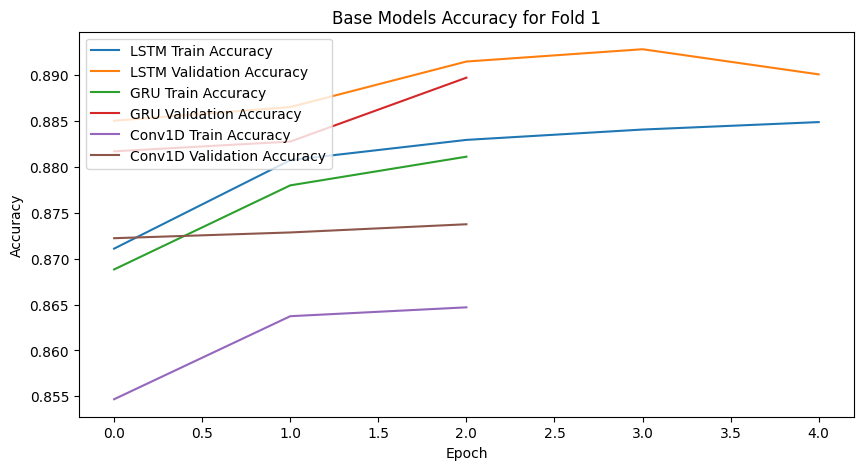

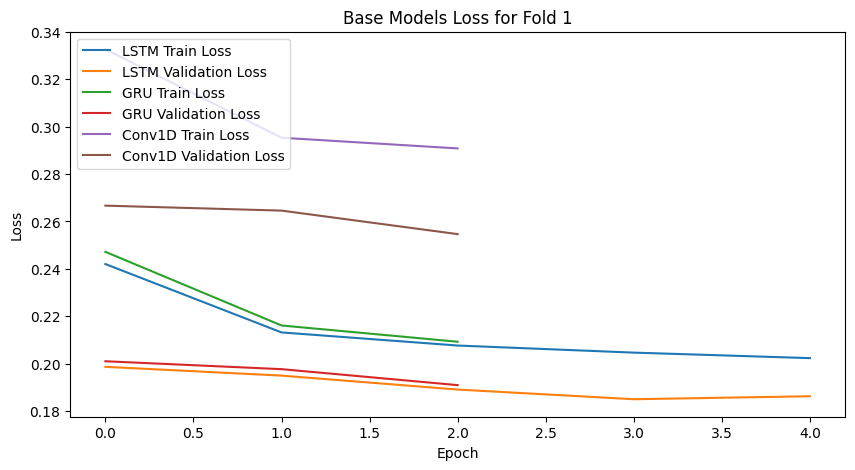

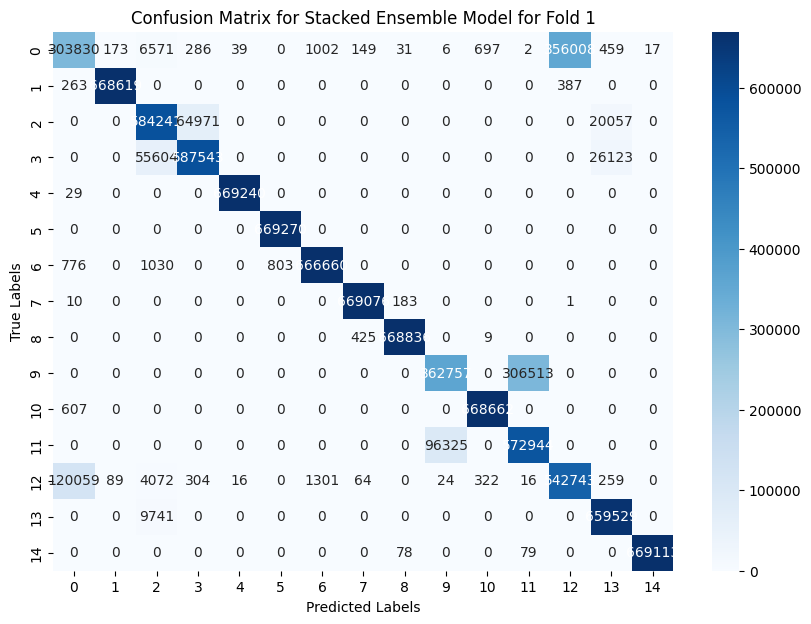

------------------------------------------------------------------------
Training for fold 2 ...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
313721/313721 ━━━━━━━━━━━━━━━━━━━━ 2216s 7ms/step - accuracy: 0.8585 - loss: 0.2921 - val_accuracy: 0.8802 - val_loss: 0.2020 - learning_rate: 0.0010
Epoch 2/5
313721/313721 ━━━━━━━━━━━━━━━━━━━━ 2215s 7ms/step - accuracy: 0.8772 - loss: 0.2183 - val_accuracy: 0.8842 - val_loss: 0.1966 - learning_rate: 0.0010
Epoch 3/5
313721/313721 ━━━━━━━━━━━━━━━━━━━━ 2221s 7ms/step - accuracy: 0.8798 - loss: 0.2115 - val_accuracy: 0.8840 - val_loss: 0.1947 - learning_rate: 0.0010
Epoch 4/5
313721/313721 ━━━━━━━━━━━━━━━━━━━━ 2223s 7ms/step - accuracy: 0.8825 - loss: 0.2074 - val_accuracy: 0.8896 - val_loss: 0.1896 - learning_rate: 0.0010
Epoch 5/5
313721/313721 ━━━━━━━━━━━━━━━━━━━━ 2221s 7ms/step - accuracy: 0.8841 - loss: 0.2040 - val_accuracy: 0.8887 - val_loss: 0.1875 - learning_rate: 0.0010
Epoch 1/5
313721/313721 ━━━━━━━━━━━━━━━━━━━━ 2145s 7ms/step - accuracy: 0.8577 - loss: 0.2930 - val_accuracy: 0.8884 - val_loss: 0.2020 - learning_rate: 0.0010
Epoch 2/5
313721/313721 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


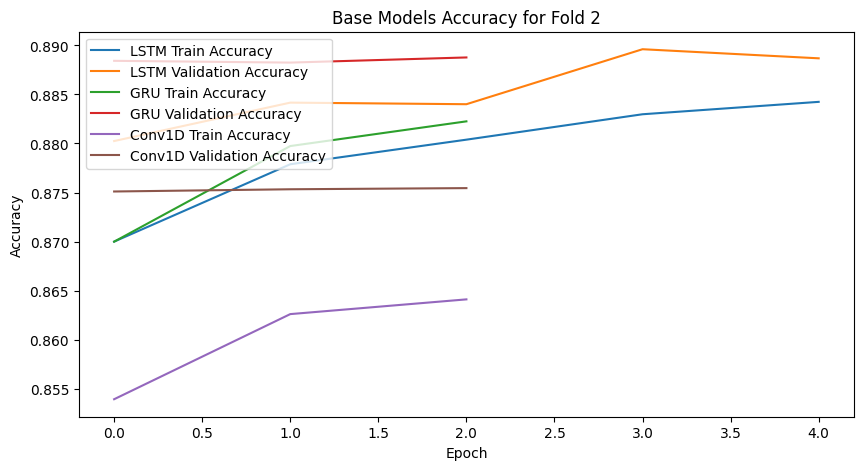

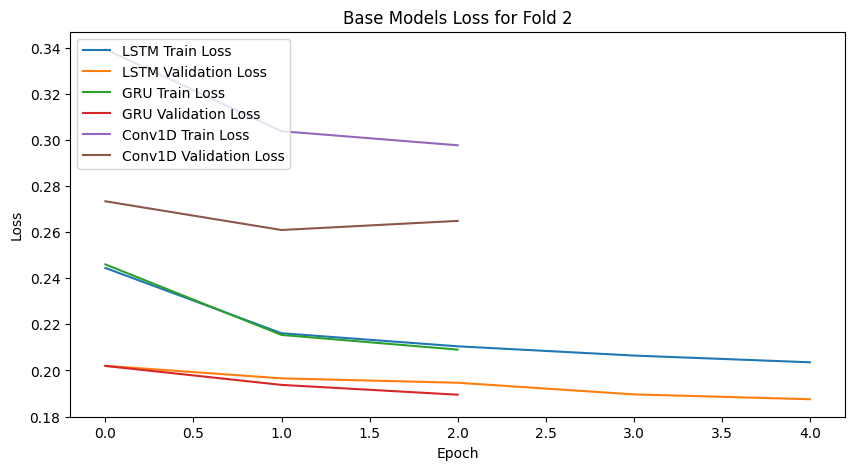

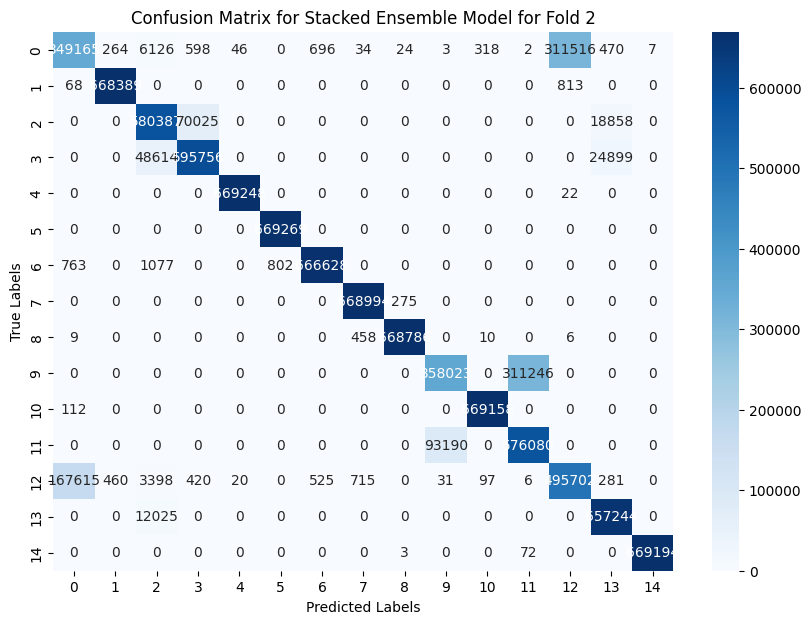

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Precision: 0.8979 - Recall: 0.8928 - F1 Score: 0.8899 - ROC-AUC: 0.9426
------------------------------------------------------------------------
> Fold 2 - Precision: 0.8963 - Recall: 0.8927 - F1 Score: 0.8907 - ROC-AUC: 0.9425
------------------------------------------------------------------------
Average scores for all folds:
> Precision: 0.8971
> Recall: 0.8928
> F1 Score: 0.8903
> ROC-AUC: 0.9426
------------------------------------------------------------------------


In [8]:
#Stacked Ensemble Approach model
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
X_scaled = X_resampled
y_scaled = y_resampled

# Initialize K-fold cross-validation
num_folds = 2
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Prepare storage for the fold results
fold_no = 1
acc_per_fold = []
loss_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_score_per_fold = []
roc_auc_per_fold = []
conf_matrices = []

for train, test in kfold.split(X_scaled, y_scaled):
    print(f'------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Reshape data for LSTM and GRU
    X_train_rnn = X_scaled[train].reshape((X_scaled[train].shape[0], 1, X_scaled[train].shape[1]))
    X_test_rnn = X_scaled[test].reshape((X_scaled[test].shape[0], 1, X_scaled[test].shape[1]))

    # Reshape data for Conv1D
    X_train_conv1d = X_scaled[train].reshape((X_scaled[train].shape[0], X_scaled[train].shape[1], 1))
    X_test_conv1d = X_scaled[test].reshape((X_scaled[test].shape[0], X_scaled[test].shape[1], 1))

    # LSTM model
    lstm_model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
        BatchNormalization(),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(len(np.unique(y_scaled)), activation='softmax')
    ])

    # GRU model
    gru_model = Sequential([
        GRU(64, return_sequences=True, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
        BatchNormalization(),
        Dropout(0.3),
        GRU(32),
        Dropout(0.3),
        Dense(len(np.unique(y_scaled)), activation='softmax')
    ])

    #  Conv1D model
    conv1d_model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_conv1d.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dropout(0.3),
        Dense(len(np.unique(y_scaled)), activation='softmax')
    ])

    # Compile
    models = [lstm_model, gru_model, conv1d_model]
    for model in models:
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)
    ]

    # Train
    history_lstm = lstm_model.fit(X_train_rnn, y_scaled[train], epochs=5, batch_size=32, validation_data=(X_test_rnn, y_scaled[test]), callbacks=callbacks)
    history_gru = gru_model.fit(X_train_rnn, y_scaled[train], epochs=5, batch_size=32, validation_data=(X_test_rnn, y_scaled[test]), callbacks=callbacks)
    history_conv1d = conv1d_model.fit(X_train_conv1d, y_scaled[train], epochs=5, batch_size=32, validation_data=(X_test_conv1d, y_scaled[test]), callbacks=callbacks)

    # predictions with each base model
    y_pred_lstm = lstm_model.predict(X_test_rnn)
    y_pred_gru = gru_model.predict(X_test_rnn)
    y_pred_conv1d = conv1d_model.predict(X_test_conv1d)

    # Combine predictions for the meta-learner
    meta_X_test = np.hstack([y_pred_lstm, y_pred_gru, y_pred_conv1d])

    # Trainning meta-learner using Logistic Regression
    meta_learner = LogisticRegression(max_iter=1000)
    meta_learner.fit(meta_X_test, y_scaled[test])

    # Predict with meta-learner
    meta_pred = meta_learner.predict(meta_X_test)

    # Calculate metrics
    precision = precision_score(y_scaled[test], meta_pred, average='weighted')
    recall = recall_score(y_scaled[test], meta_pred, average='weighted')
    f1 = f1_score(y_scaled[test], meta_pred, average='weighted')
    roc_auc = roc_auc_score(tf.keras.utils.to_categorical(y_scaled[test]), tf.keras.utils.to_categorical(meta_pred), average='weighted', multi_class='ovr')

    # Save per-fold results
    precision_per_fold.append(precision)
    recall_per_fold.append(recall)
    f1_score_per_fold.append(f1)
    roc_auc_per_fold.append(roc_auc)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_scaled[test], meta_pred)
    conf_matrices.append(conf_matrix)

    # Plotting training & validation accuracy values
    plt.figure(figsize=(10, 5))
    plt.plot(history_lstm.history['accuracy'], label='LSTM Train Accuracy')
    plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy')
    plt.plot(history_gru.history['accuracy'], label='GRU Train Accuracy')
    plt.plot(history_gru.history['val_accuracy'], label='GRU Validation Accuracy')
    plt.plot(history_conv1d.history['accuracy'], label='Conv1D Train Accuracy')
    plt.plot(history_conv1d.history['val_accuracy'], label='Conv1D Validation Accuracy')
    plt.title(f'Base Models Accuracy for Fold {fold_no}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Plotting training & validation loss values
    plt.figure(figsize=(10, 5))
    plt.plot(history_lstm.history['loss'], label='LSTM Train Loss')
    plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
    plt.plot(history_gru.history['loss'], label='GRU Train Loss')
    plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
    plt.plot(history_conv1d.history['loss'], label='Conv1D Train Loss')
    plt.plot(history_conv1d.history['val_loss'], label='Conv1D Validation Loss')
    plt.title(f'Base Models Loss for Fold {fold_no}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Enhanced Confusion Matrix Visualization
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for Stacked Ensemble Model for Fold {fold_no}')
    plt.show()

    fold_no += 1

#AVG Scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(precision_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Precision: {precision_per_fold[i]:.4f} - Recall: {recall_per_fold[i]:.4f} - F1 Score: {f1_score_per_fold[i]:.4f} - ROC-AUC: {roc_auc_per_fold[i]:.4f}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Precision: {np.mean(precision_per_fold):.4f}')
print(f'> Recall: {np.mean(recall_per_fold):.4f}')
print(f'> F1 Score: {np.mean(f1_score_per_fold):.4f}')
print(f'> ROC-AUC: {np.mean(roc_auc_per_fold):.4f}')
print('------------------------------------------------------------------------')
